In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [33]:
reeses = cv2.imread(r'../DATA/reeses_puffs.png',0)

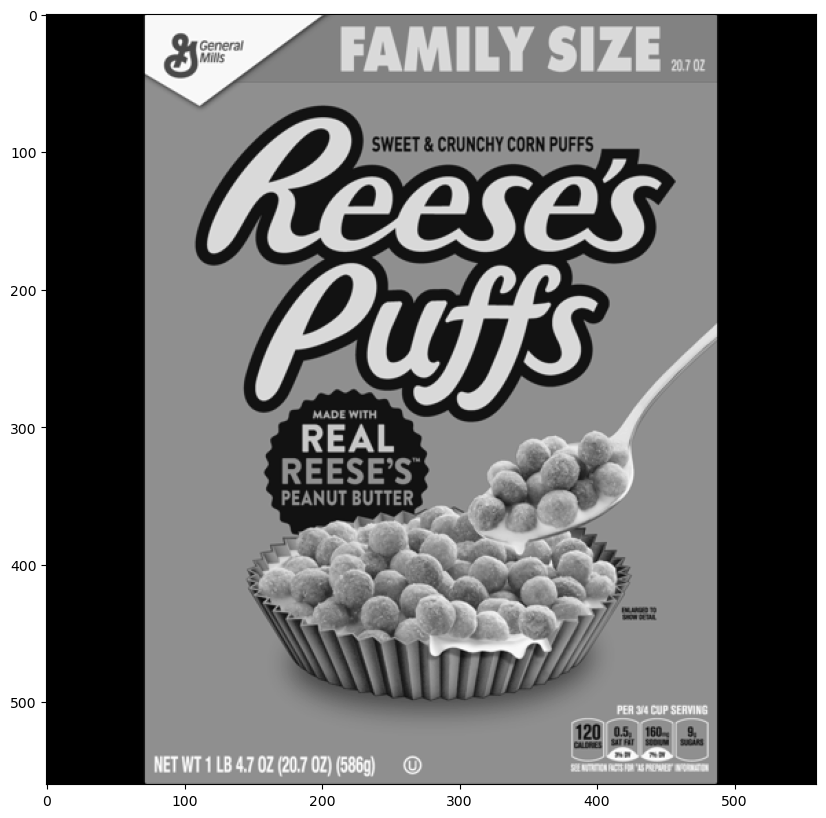

In [34]:
display(reeses)

In [35]:
cereals = cv2.imread(r'../DATA/many_cereals.jpg',0)

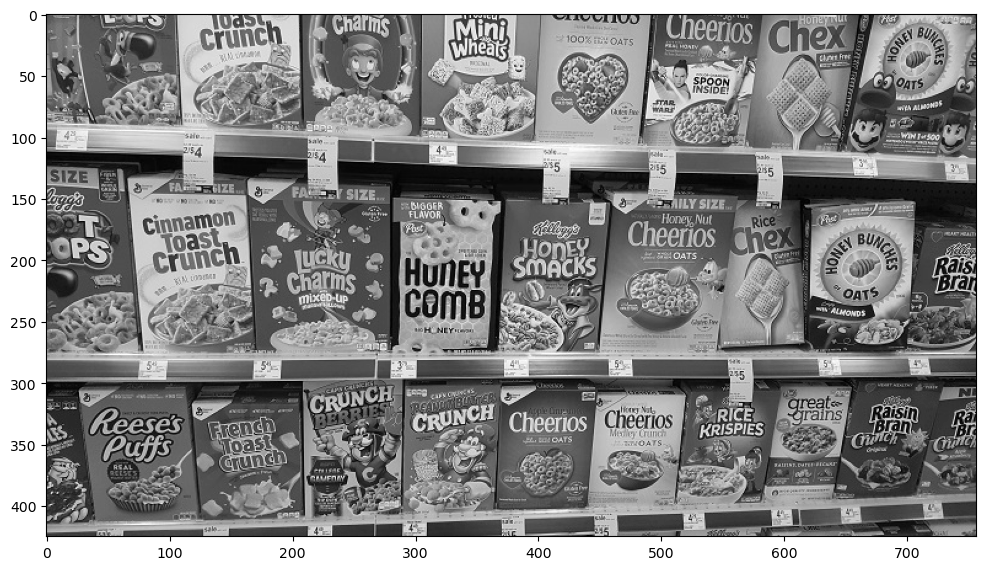

In [36]:
display(cereals)

In [37]:
orb = cv2.ORB_create()

In [38]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [39]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [40]:
matches = bf.match(des1,des2)

In [41]:
matches

(< cv2.DMatch 0000016EAD45D150>,
 < cv2.DMatch 0000016EAB4038B0>,
 < cv2.DMatch 0000016EAEF53330>,
 < cv2.DMatch 0000016EAD93DEB0>,
 < cv2.DMatch 0000016EAD93DCB0>,
 < cv2.DMatch 0000016EAD93D710>,
 < cv2.DMatch 0000016EAD93D650>,
 < cv2.DMatch 0000016EAEF19EF0>,
 < cv2.DMatch 0000016EAEF19970>,
 < cv2.DMatch 0000016EAEF19CF0>,
 < cv2.DMatch 0000016EAEF198B0>,
 < cv2.DMatch 0000016EAEF19BD0>,
 < cv2.DMatch 0000016EAEF19B30>,
 < cv2.DMatch 0000016EAEF19C90>,
 < cv2.DMatch 0000016EAEF19C30>,
 < cv2.DMatch 0000016EAEF194D0>,
 < cv2.DMatch 0000016EAEF19CD0>,
 < cv2.DMatch 0000016EAEF19670>,
 < cv2.DMatch 0000016EAF434330>,
 < cv2.DMatch 0000016EAF434270>,
 < cv2.DMatch 0000016EAF434070>,
 < cv2.DMatch 0000016EAF434230>,
 < cv2.DMatch 0000016EAF4341F0>,
 < cv2.DMatch 0000016EAF434150>,
 < cv2.DMatch 0000016EAF434030>,
 < cv2.DMatch 0000016EAF4340F0>,
 < cv2.DMatch 0000016EAF434210>,
 < cv2.DMatch 0000016EAF434670>,
 < cv2.DMatch 0000016EAF4342B0>,
 < cv2.DMatch 0000016EAF434110>,
 < cv2.DMa

In [42]:
single_match = matches[0]

In [43]:
single_match.distance

56.0

In [44]:
len(matches)

139

In [45]:
matches = sorted(matches,key=lambda  x:x.distance)

In [46]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

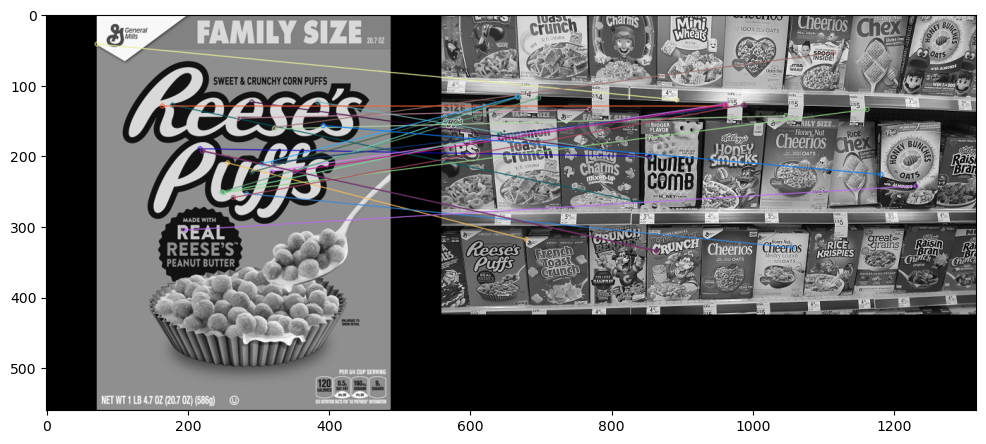

In [47]:
display(reeses_matches)

In [48]:
sift = cv2.xfeatures2d.SIFT_create()

In [49]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [50]:
bf = cv2.BFMatcher()

In [51]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [52]:
matches = bf.knnMatch(des1,des2,k=2)

In [53]:
good = []

#LESS DISTANCE == BETTER MATCH
for match1,match2 in matches:
    '''
    if match1 distance is less than 75% of match2 distance
    then descriptor was a good match, let's keep it!
    '''
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [54]:
matches

((< cv2.DMatch 0000016EAD44A790>, < cv2.DMatch 0000016EAD98DE30>),
 (< cv2.DMatch 0000016EAD852390>, < cv2.DMatch 0000016EAD852F10>),
 (< cv2.DMatch 0000016EAD852A70>, < cv2.DMatch 0000016EAD8523F0>),
 (< cv2.DMatch 0000016EAEF53E30>, < cv2.DMatch 0000016EAEF53D90>),
 (< cv2.DMatch 0000016EAEF534B0>, < cv2.DMatch 0000016EAEF53870>),
 (< cv2.DMatch 0000016EAEF537D0>, < cv2.DMatch 0000016EAEF537B0>),
 (< cv2.DMatch 0000016EAEF53B10>, < cv2.DMatch 0000016EAEF53E90>),
 (< cv2.DMatch 0000016EAF434690>, < cv2.DMatch 0000016EAF3DD630>),
 (< cv2.DMatch 0000016EAF3DD570>, < cv2.DMatch 0000016EAF3DD4D0>),
 (< cv2.DMatch 0000016EAF3DD4F0>, < cv2.DMatch 0000016EAF3DD3B0>),
 (< cv2.DMatch 0000016EAF3DD430>, < cv2.DMatch 0000016EAF3DD0F0>),
 (< cv2.DMatch 0000016EAF3DD450>, < cv2.DMatch 0000016EAF3DD490>),
 (< cv2.DMatch 0000016EAF3DD810>, < cv2.DMatch 0000016EAF3DD510>),
 (< cv2.DMatch 0000016EAF3DD4B0>, < cv2.DMatch 0000016EAF3DD410>),
 (< cv2.DMatch 0000016EAF3DD550>, < cv2.DMatch 0000016EAF3DD73

In [55]:
good

[[< cv2.DMatch 0000016EAD44A790>],
 [< cv2.DMatch 0000016EAD9950B0>],
 [< cv2.DMatch 0000016EAD995670>],
 [< cv2.DMatch 0000016EAD9956B0>],
 [< cv2.DMatch 0000016EAD9958B0>],
 [< cv2.DMatch 0000016EAD995EB0>],
 [< cv2.DMatch 0000016EAD9751F0>],
 [< cv2.DMatch 0000016EAD975370>],
 [< cv2.DMatch 0000016EAD9756F0>],
 [< cv2.DMatch 0000016EAD975930>],
 [< cv2.DMatch 0000016EAD975CF0>],
 [< cv2.DMatch 0000016EAD975DF0>],
 [< cv2.DMatch 0000016EAF46D0F0>],
 [< cv2.DMatch 0000016EAF46D130>],
 [< cv2.DMatch 0000016EAF46D230>],
 [< cv2.DMatch 0000016EAF46DFB0>],
 [< cv2.DMatch 0000016EAF46F970>],
 [< cv2.DMatch 0000016EAF46FA30>],
 [< cv2.DMatch 0000016EAF46FAF0>],
 [< cv2.DMatch 0000016EAF4713B0>],
 [< cv2.DMatch 0000016EAF4714F0>],
 [< cv2.DMatch 0000016EAF473630>],
 [< cv2.DMatch 0000016EAF473770>],
 [< cv2.DMatch 0000016EAF4737B0>],
 [< cv2.DMatch 0000016EAF473970>],
 [< cv2.DMatch 0000016EAF4739B0>],
 [< cv2.DMatch 0000016EAF475BF0>],
 [< cv2.DMatch 0000016EAF475D70>],
 [< cv2.DMatch 00000

In [57]:
print(f'Len of matches {len(matches)} - Len of good {len(good)}')

Len of matches 1501 - Len of good 79


In [58]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

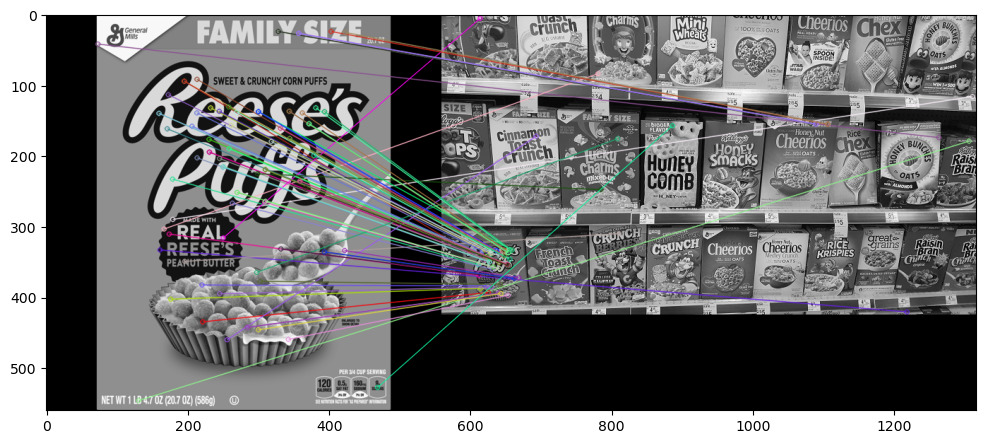

In [59]:
display(sift_matches)

In [60]:
sift = cv2.xfeatures2d.SIFT_create()

In [61]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [62]:
#FLANN
#it is fast, but not best
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [63]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [64]:
matches = flann.knnMatch(des1,des2,k=2)

In [65]:
good = []

for match1,match2 in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])

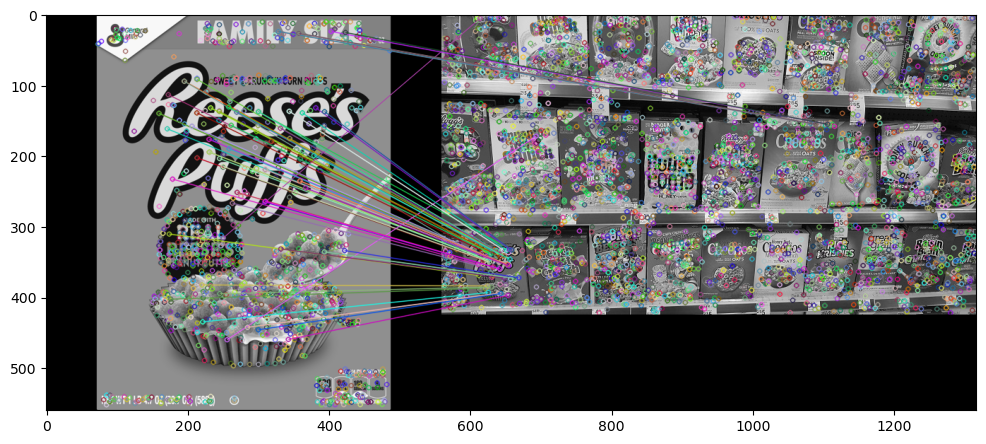

In [67]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)
display(flann_matches)